In [21]:
import numpy as np
import pandas as pd

In [22]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [23]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [24]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

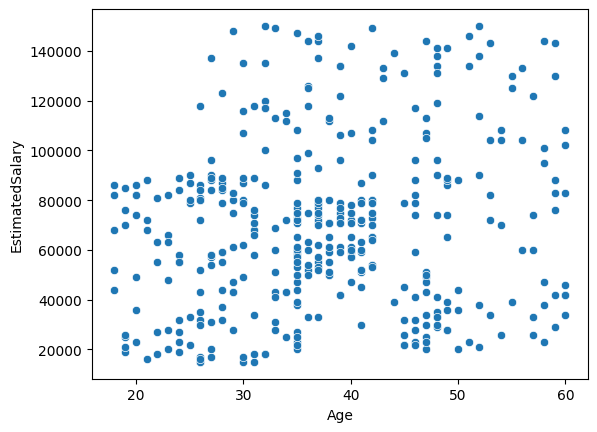

In [25]:
sns.scatterplot(data=df,x='Age',y='EstimatedSalary')

In [26]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [29]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               384       
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 24ms/step - loss: 1202.6060 - accuracy: 0.5594 - val_loss: 652.9286 - val_accuracy: 0.3500
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 277.0306 - accuracy: 0.5031 - val_loss: 49.0786 - val_accuracy: 0.3500
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 72.5245 - accuracy: 0.5031 - val_loss: 119.6783 - val_accuracy: 0.3500
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 91.5221 - accuracy: 0.5031 - val_loss: 53.9758 - val_accuracy: 0.3500
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 27.1451 - accuracy: 0.4594 - val_loss: 81.9935 - val_accuracy: 0.6500
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 78.1881 - accuracy: 0.5406 - val_loss: 61.3789 - val_accuracy: 0.6500
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 80.3645 - accuracy: 0.5656 - val_loss: 66.6115 - val_accuracy: 

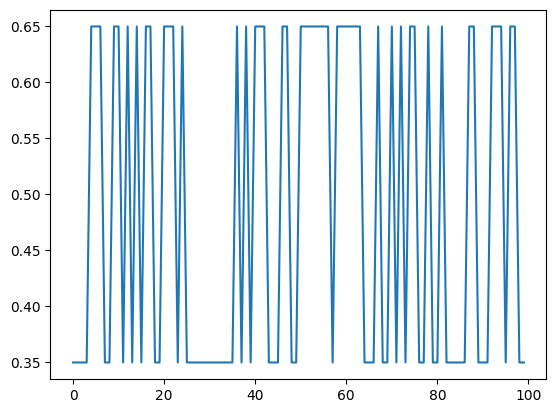

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.show()

In [34]:
# Applying scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [35]:
X_train_scaled

array([[-1.06675246, -0.38634438],
       [ 0.79753468, -1.22993871],
       [ 0.11069205,  1.853544  ],
       [ 0.60129393, -0.90995465],
       [ 1.87685881, -1.28811763],
       [-0.57615058,  1.44629156],
       [ 0.3069328 , -0.53179168],
       [ 0.99377543,  0.10817643],
       [-1.16487283,  0.45724994],
       [-1.55735433,  0.31180264],
       [ 1.0918958 ,  0.45724994],
       [-0.18366908, -0.47361276],
       [ 0.20881242, -0.32816546],
       [ 0.3069328 ,  0.28271318],
       [-1.16487283, -1.57901222],
       [ 0.11069205,  0.25362372],
       [ 2.07309956,  1.73718616],
       [ 0.40505317, -0.18271817],
       [ 1.4843773 ,  2.11534913],
       [-0.37990983,  1.21357589],
       [ 1.87685881,  1.50447048],
       [ 0.11069205,  0.02090805],
       [ 0.89565505, -1.31720709],
       [-1.36111358, -1.49174384],
       [-0.18366908, -0.5899706 ],
       [-0.57615058,  2.31897535],
       [ 0.99377543, -1.20084925],
       [-0.77239133,  1.06812859],
       [ 2.17121993,

<Axes: >

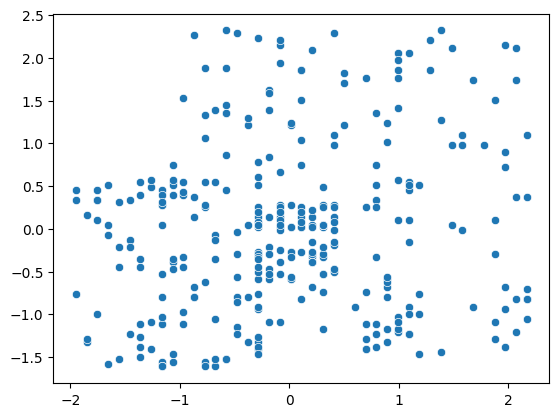

In [36]:
sns.scatterplot(data = X_train,x = X_train_scaled[:,0],y = X_train_scaled[:,1])

In [37]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 2s 43ms/step - loss: 0.6494 - accuracy: 0.7750 - val_loss: 0.5971 - val_accuracy: 0.8875
Epoch 2/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5968 - accuracy: 0.8406 - val_loss: 0.5391 - val_accuracy: 0.9000
Epoch 3/100
10/10 [==============================] - 0s 11ms/step - loss: 0.5539 - accuracy: 0.8438 - val_loss: 0.4903 - val_accuracy: 0.9000
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5159 - accuracy: 0.8500 - val_loss: 0.4499 - val_accuracy: 0.8875
Epoch 5/100
10/10 [==============================] - 0s 11ms/step - loss: 0.4850 - accuracy: 0.8438 - val_loss: 0.4161 - val_accuracy: 0.8875
Epoch 6/100
10/10 [==============================] - 0s 17ms/step - loss: 0.4591 - accuracy: 0.8313 - val_loss: 0.3856 - val_accuracy: 0.8875
Epoch 7/100
10/10 [==============================] - 0s 17ms/step - loss: 0.4359 - accuracy: 0.8375 - val_loss: 0.3602 - val_accuracy: 0.8875
Epoch 

In [38]:
# We got 93% to 95% accuracy After applying scaling

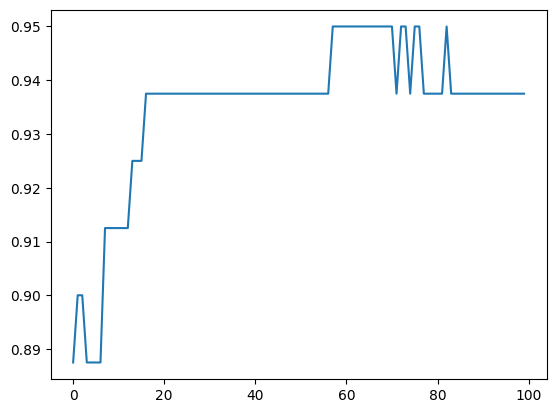

In [39]:
plt.plot(history.history['val_accuracy'])